In [1]:
import pandas as pd
import numpy as  np
import random as rd

In [24]:
#generate list of random numbers
data = pd.DataFrame()
data['Population'] = [rd.randint(1,100) for i in range(0,10000)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3195b4bd68>]],
      dtype=object)

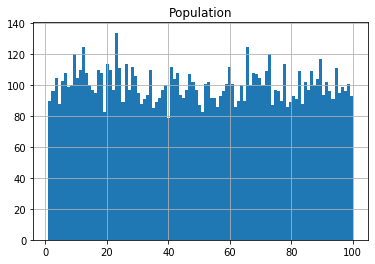

In [25]:
data.hist(bins=100)

In [26]:
#generate random sample w/o replacement
sample_wo_rep = data['Population'].sample(20,replace=False)
print(sample_wo_rep.to_list())

[11, 80, 20, 1, 92, 41, 3, 85, 94, 5, 64, 75, 45, 33, 4, 68, 15, 59, 83, 91]


In [27]:
#generate random sample w/replacement
sample_w_rep = data['Population'].sample(20,replace=True)
print(sample_w_rep.to_list())

[42, 36, 51, 87, 92, 59, 12, 55, 13, 14, 9, 78, 73, 3, 43, 83, 97, 50, 21, 9]


In [28]:
stats = pd.DataFrame(index=['Mean'
          ,'Variance'
          ,'Standard Deviation'
          ,'Size']
        ,data=[data['Population'].mean()
        ,data['Population'].var(ddof=0)
        ,data['Population'].std(ddof=0)
        ,data['Population'].shape[0]]
        ,columns=['Population Parameters'])
          

In [29]:
stats

,Population Parameters
Mean,50.122000
Variance,841.685316
Standard Deviation,29.011813
Size,10000.000000


In [30]:
stats['Sample Statistics'] = pd.Series(index=stats.index
        ,data=[sample_w_rep.mean()
        ,sample_w_rep.var(ddof=1)
        ,sample_w_rep.std(ddof=1)
        ,sample_w_rep.shape[0]])

In [31]:
stats

,Population Parameters,Sample Statistics
Mean,50.122000,46.350000
Variance,841.685316,969.186842
Standard Deviation,29.011813,31.131766
Size,10000.000000,20.000000


In [32]:
#generate a random sample from a normal distribution
sample = pd.DataFrame(np.random.normal(10,5,size=30))
print(sample[0].mean())
print(sample[0].std(ddof=1))

10.204332429090302
3.8373730343997448


In [33]:
#generate 10000 random samples and compute sample statistics
mean = []
var = []
std = []
for t in range(10000):
    sample = data['Population'].sample(20, replace=True)
    mean.append(sample.mean())
    var.append(sample.var(ddof=1))
    std.append(sample.std(ddof=1))

collect = pd.DataFrame()
collect['mean'] = mean
collect['variance'] = var
collect['stdev'] = std

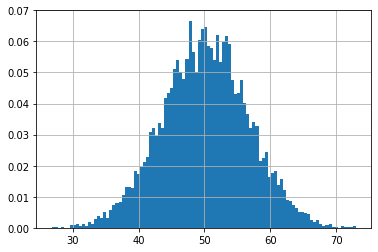

In [34]:
collect['mean'].hist(bins=100, normed=1)

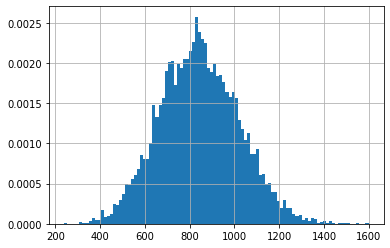

In [35]:
collect['variance'].hist(bins=100, normed=1)

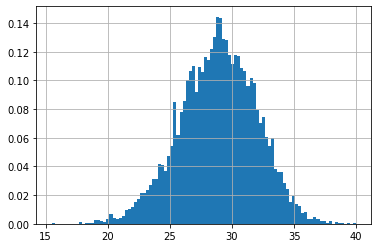

In [36]:
collect['stdev'].hist(bins=100, normed=1)

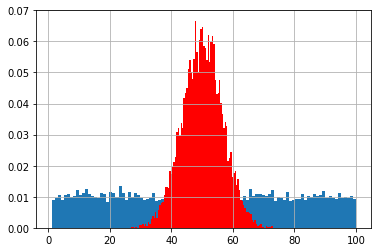

In [37]:
pop = data['Population']
pop.hist(bins=100,normed=1)
collect['mean'].hist(bins=100,normed=1,color='red')

#observe that the population distribution is uniform,
#but the sample mean is still normal